In [1]:
from anomaly_detection import config, dataset, features
import numpy as np

# set seed for reproducibility
np.random.seed(42)

In [2]:
file_path = '/Users/emadchelhi/Desktop/git_repos/Why-anomalous/data/raw/Wholesale customers data.csv'

# load the data
tab_df = dataset.load_data(file_path)

Data successfully loaded from /Users/emadchelhi/Desktop/git_repos/Why-anomalous/data/raw/Wholesale customers data.csv.


In [3]:
# excluding the categorical columns
del tab_df['Channel']
del tab_df['Region']

In [4]:
# log-transform the data
tab_df = features.logarithm(tab_df, 100)

Top 10 most anomalous instances:
Fresh               10.517240
Milk                10.693081
Grocery              9.916897
Frozen              10.508732
Detergents_Paper     5.826000
Delicassen          10.779852
Name: 183, dtype: float64
--------------
Fresh               4.634729
Milk                6.070738
Grocery             8.870803
Frozen              9.661480
Detergents_Paper    4.744932
Delicassen          6.476972
Name: 338, dtype: float64
--------------
Fresh               7.585281
Milk                6.517671
Grocery             6.510258
Frozen              6.956545
Detergents_Paper    8.489205
Delicassen          5.713733
Name: 228, dtype: float64
--------------
Fresh               6.582025
Milk                5.043425
Grocery             5.468060
Frozen              5.164786
Detergents_Paper    4.672829
Delicassen          4.682131
Name: 154, dtype: float64
--------------
Fresh               9.928083
Milk                7.120444
Grocery             4.634729
Frozen        

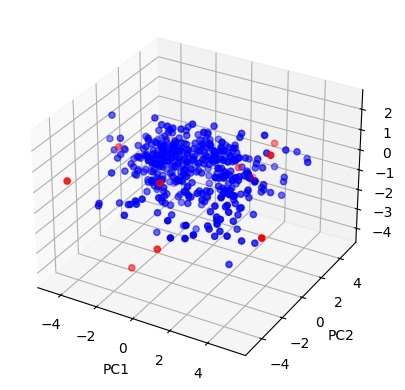

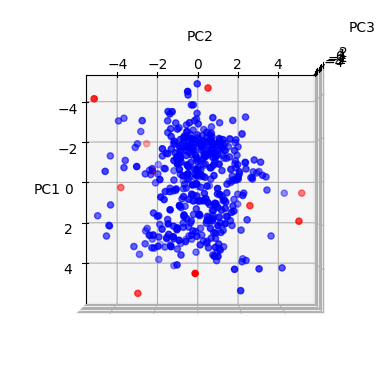

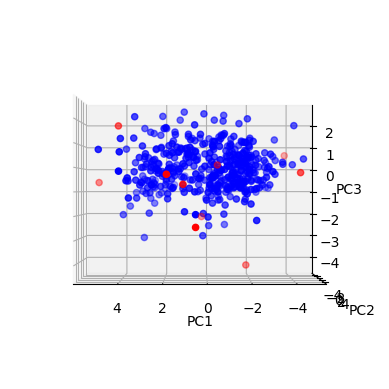

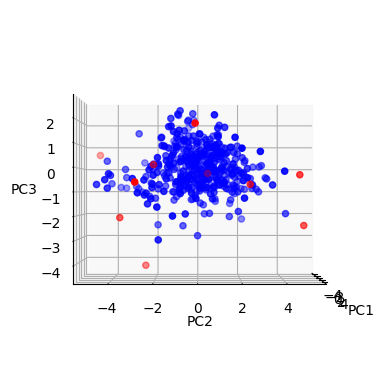

In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Fit nearest neighbors model
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(tab_df)

# Calculate distances to nearest neighbors
distances, indices = nbrs.kneighbors(tab_df)

# Calculate anomaly scores
anomaly_scores = distances[:, 1]

# Rank data points by anomaly score
ranked_indices = anomaly_scores.argsort()[::-1]

# Extract top 10 most anomalous instances
top_10_anomalies = ranked_indices[:10]

# Print recorded spending for the top 10 anomalies
print("Top 10 most anomalous instances:")
for idx in top_10_anomalies:
    print(tab_df.iloc[idx])
    print("--------------")

anomalies = tab_df.iloc[top_10_anomalies]
non_anomalies = tab_df.drop(top_10_anomalies)

# Do PCA on both the anomalies and non-anomalies
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(tab_df)
pca_tab_df = pca.transform(tab_df)
pca_anomalies = pca.transform(anomalies)
pca_non_anomalies = pca.transform(non_anomalies)
pca_tab_df = pd.DataFrame(pca_tab_df, columns=['PC1', 'PC2', 'PC3'])
pca_anomalies = pd.DataFrame(pca_anomalies, columns=['PC1', 'PC2', 'PC3'])
pca_non_anomalies = pd.DataFrame(pca_non_anomalies, columns=['PC1', 'PC2', 'PC3'])

# Plot the PCA results
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_non_anomalies['PC1'], pca_non_anomalies['PC2'], pca_non_anomalies['PC3'], c='blue', label='Normal')
ax.scatter(pca_anomalies['PC1'], pca_anomalies['PC2'], pca_anomalies['PC3'], c='red', label='Anomaly')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()
# Show it in multiple angles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_non_anomalies['PC1'], pca_non_anomalies['PC2'], pca_non_anomalies['PC3'], c='blue', label='Normal')
ax.scatter(pca_anomalies['PC1'], pca_anomalies['PC2'], pca_anomalies['PC3'], c='red', label='Anomaly')
ax.view_init(90, 0)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_non_anomalies['PC1'], pca_non_anomalies['PC2'], pca_non_anomalies['PC3'], c='blue', label='Normal')
ax.scatter(pca_anomalies['PC1'], pca_anomalies['PC2'], pca_anomalies['PC3'], c='red', label='Anomaly')
ax.view_init(0, 90)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_non_anomalies['PC1'], pca_non_anomalies['PC2'], pca_non_anomalies['PC3'], c='blue', label='Normal')
ax.scatter(pca_anomalies['PC1'], pca_anomalies['PC2'], pca_anomalies['PC3'], c='red', label='Anomaly')
ax.view_init(0, 0)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


fitted to the data a 2-nearest neighbor model from scikit-learn (ball-tree algorithm, very efficient for knn discovery because once a sufficient n° of balls is created, it's not anymore necessary to compute the distance to all data points https://ashokharnal.wordpress.com/tag/ball-tree-explained-in-simple-manner/). Printed the 10 most anomalous instances and visualized them leveraging PCA. This is the plot obtained. The red dots are the outliers.  


The main issue of this first model is its low reproducibility or robustness. Because of the hard min distance chosen to rate the outlier score of an instance, it is highly sensitive to individual outliers and small variations of the data can lead to big differences.